# Analyze total and gene-level cumulative protein synthesis over one cell cycle

In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["Consolas"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
from statsmodels.nonparametric.smoothers_lowess import lowess

In [12]:
filepath = r'/home/martin/git/TRSL/parameters/translation_rate_full_df.p.csv'

In [13]:
df = pd.read_csv(filepath).transpose()

Convert first row to column headers and delete first row:

In [14]:
df.columns = df.iloc[0]
#df.columns = np.arange(300, 3601, 300)

df = df.iloc[1:]

In [15]:
df.columns

Float64Index([   0.0,  300.0,  600.0,  900.0, 1200.0, 1500.0, 1800.0, 2100.0,
              2400.0, 2700.0, 3000.0, 3300.0],
             dtype='float64', name=u'Unnamed: 0')

In [16]:
df.describe()

Unnamed: 0,0.0,300.0,600.0,900.0,1200.0,1500.0,1800.0,2100.0,2400.0,2700.0,3000.0,3300.0
count,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000,6713.000000
mean,0.353527,0.359694,0.410645,0.419252,0.436825,0.338907,0.344280,0.347971,0.350578,0.357834,0.267156,0.389120
std,2.084183,2.062460,2.450412,2.455877,2.629162,1.914643,1.980040,2.017671,2.066274,2.213923,1.528811,2.314130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.033333,0.036667,0.035000,0.036667,0.040000,0.045000,0.040000,0.040000,0.040000,0.041667,0.000000,0.045000
75%,0.128333,0.135000,0.148333,0.155000,0.160000,0.143333,0.146667,0.145000,0.143333,0.136667,0.120000,0.161667
max,59.815000,54.806667,65.833333,61.651667,69.275000,47.800000,54.265000,51.615000,55.588333,62.780000,40.286667,60.698333


In [17]:
df.shape

(6713, 12)

In [18]:
df.head()

Unnamed: 0,0.0,300.0,600.0,900.0,1200.0,1500.0,1800.0,2100.0,2400.0,2700.0,3000.0,3300.0
Q0010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q0017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q0032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q0045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Q0050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Data is proteins per second per gene.

To obtain total production over one cell cycle, multiply by 300 s and sum across columns.

In [19]:
total_prod = df.sum(axis=1).sort_values(ascending=False) * 300
total_prod.head(n=10)

YLR044C    202454.0
YLR110C    192442.0
YLR109W    169109.0
YKL152C    157559.5
YKL060C    135622.0
YOL086C    122789.0
YDR050C    111545.0
YOR063W    109771.5
YGL030W    106426.5
YGL103W    100261.5
dtype: float64

In [20]:
total_prod.sum()

8812398.5

In [21]:
total_prod.to_csv('total_prod.csv')

Copy Kulak data from https://docs.google.com/spreadsheets/d/1R5VPvz9ALNWz_DVZPUKTVRZJWcV3OO_XtUayE8TylCs/edit#gid=613384679 to clipboard.

In [22]:
kulak = pd.read_csv('../../data/Kulak_protein_abundances.csv')

In [23]:
kulak.head()

,Kulak_rank,ORF,Kulak_abundance
0,1,YGR192C,1575311
1,2,YHR174W,929818
2,3,YKL060C,847652
3,4,YLR044C,705652
4,5,YBR118W;YPR080W,630115


In [24]:
plt.rcParams['axes.facecolor']='white'
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['patch.edgecolor'] = 'powderblue'
plt.rcParams["patch.force_edgecolor"] = True  # required
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'
plt.rcParams['axes.color_cycle'] = ['steelblue', 'darkred', 'darkgreen']

/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [25]:
myedgecolor = 'powderblue'
myfacecolor = 'steelblue'

In [26]:
def scatter_dicts(dict1, dict2, xaxislabel=None, yaxislabel=None, fontsize=None, markersize=20,
                  alpha=0.8, figsize=(10, 10), rasterized=True, filename="scatterdict.png"):
    plotkeys = dict1.viewkeys() & dict2.viewkeys() # set intersection
    print len(plotkeys)
    xs = [dict1[key] for key in plotkeys]
    ys = [dict2[key] for key in plotkeys] 

    fig =  plt.figure(figsize=figsize)                

    ax = fig.add_subplot(111)
    #ax.set_rasterization_zorder(1)
    
    ax.grid(True, linestyle = '-', color = '0.75')
    ax.set_xscale('log')
    ax.set_yscale('log')
    if xaxislabel:
        ax.set_xlabel(xaxislabel)
        if fontsize:
            ax.set_xlabel(xaxislabel, fontsize=fontsize)
            plt.setp(ax.get_xticklabels(), fontsize=fontsize)
    if yaxislabel:
        ax.set_ylabel(yaxislabel)
        if fontsize:
            ax.set_ylabel(yaxislabel, fontsize=fontsize)
            plt.setp(ax.get_yticklabels(), fontsize=fontsize)

    scat = plt.scatter(xs, ys,
                       #c=plt.rcParams['axes.color_cycle'][0], 
                       c=myfacecolor, 
                       #edgecolor=plt.rcParams['patch.edgecolor'],
                       edgecolor=myedgecolor,
                       s=markersize, zorder=0)
    scat.set_alpha(alpha)
    #scat.set_color()
    #scat.set_edgecolors(plt.rcParams['patch.edgecolor'])
    # , color=, edgecolor=

    points = zip(xs, ys)
    sorted_points = sorted(points)
    new_xs = [point[0] for point in sorted_points][:-2]  # modify to remove outliers 
    new_ys = [point[1] for point in sorted_points][:-2]  # modify to remove outliers
    ylowess = lowess(new_ys, new_xs)[:,1]
    plt.plot(new_xs, ylowess, plt.rcParams['axes.color_cycle'][1], linewidth=4)

    ax.set_rasterization_zorder(1)

    plt.savefig(filename, bbox_inches='tight', dpi=200)

In [27]:
kulak_dict = dict(zip(kulak['ORF'], kulak['Kulak_abundance']))

In [28]:
trsl_dict = dict(total_prod)

4512


/home/martin/.local/lib/python2.7/site-packages/matplotlib/__init__.py:830: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


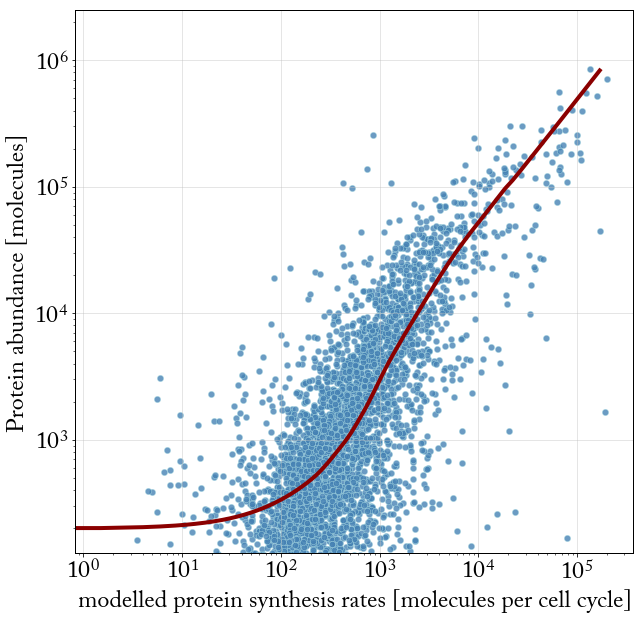

In [29]:
scatter_dicts(trsl_dict, kulak_dict, xaxislabel='modelled protein synthesis rates [molecules per hour]', 
              yaxislabel='Protein abundance [molecules]', fontsize=24, markersize=40,
              alpha=0.8, filename='modelled_synthesis_rates_vs_measured_abundance.pgf')